### Run for Specific Video

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [21]:
VID_IDX = 4

In [22]:
with open(f"bird_dog_pkls/vid_{VID_IDX}.pkl", 'rb') as f:
    bird_dog_angles = pickle.load(f)
with open(f"bird_dog_pkls/vid_{VID_IDX}_filtered.pkl", 'rb') as f:
    bird_dog_angles_filtered = pickle.load(f)

In [23]:
side_keys = [key for key in bird_dog_angles.keys() if "side" in key.lower()]
mid_keys = [key for key in bird_dog_angles.keys() if "mid" in key.lower()]

###  Run all angles

In [24]:
# figure_num = 0
# save_fig = True
# try:
#     os.mkdir("TestPlots/AllAngles/{}".format(VID_IDX))
# except:
#     print("Directory Exists")
#     save_fig = False
# for key in bird_dog_angles.keys():
#     angle = key

#     plt.figure(figure_num)
#     plt.plot(
#         range(len(bird_dog_angles[angle])), 
#         bird_dog_angles[angle],
#         label = 'orig',
#         marker = '.'

#     )
#     plt.plot(    
#         range(len(bird_dog_angles_filtered[angle])), 
#         bird_dog_angles_filtered[angle],
#         label = 'filtered',
#         marker = '.'
#     )
#     plt.title(key)
#     plt.yticks(np.linspace(0, 360, 10))
#     plt.legend()
#     if save_fig is True:
#         plt.savefig('TestPlots/AllAngles/{}/{}.png'.format(VID_IDX, key))
#     figure_num += 1
# 

In [25]:
bird_dog_angles.keys()

dict_keys(['right_upper_arm_torso_angles', 'right_upper_arm_forearm_angle', 'right_torso_thigh_angles', 'right_thigh_shank_angles', 'left_upper_arm_torso_angles', 'left_upper_arm_forearm_angles', 'left_torso_thigh_angles', 'left_thigh_shank_angles'])

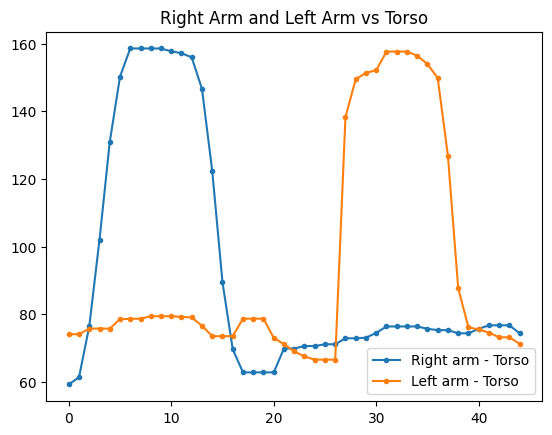

In [26]:
y_right = bird_dog_angles_filtered['right_upper_arm_torso_angles']
# y_right = y_right[:60]
x_right = range(len(y_right))

y_left = bird_dog_angles_filtered['left_upper_arm_torso_angles']
# y_left = y_left[:60]
x_left = range(len(y_left))

plt.plot(
    x_right, 
    y_right,
    label = 'Right arm - Torso',
    marker = '.'
)
plt.plot(
    x_left, 
    y_left,
    label = 'Left arm - Torso',
    marker = '.'

)
plt.legend()
plt.title("Right Arm and Left Arm vs Torso")
plt.show()

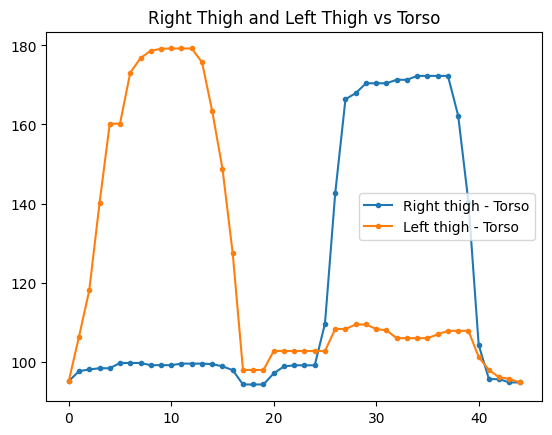

In [27]:
y_right = bird_dog_angles_filtered['right_torso_thigh_angles']
# y_right = y_right[:60]
x_right = range(len(y_right))

y_left = bird_dog_angles_filtered['left_torso_thigh_angles']
# y_left = y_left[:60]
x_left = range(len(y_left))

plt.plot(
    x_right, 
    y_right,
    label = 'Right thigh - Torso',
    marker = '.'
)
plt.plot(
    x_left, 
    y_left,
    label = 'Left thigh - Torso',
    marker = '.'

)
plt.legend()
plt.title("Right Thigh and Left Thigh vs Torso")
plt.show()

In [28]:
# Algo to determine which side is moving prior to comparison (FOR NOW SINGLE REP)
# MOVING ARM = that which more closely fits a quadratic (for single rep) 
# STATIONARY ARM = that which closely fits a horizontal line
# Same thing for legs
y_right_arm = bird_dog_angles_filtered['right_upper_arm_torso_angles']
x_right_arm = list(range(len(y_right_arm)))

y_left_arm = bird_dog_angles_filtered['left_upper_arm_torso_angles']
x_left_arm = list(range(len(y_left_arm)))

y_right_leg = bird_dog_angles_filtered['left_torso_thigh_angles']
y_right_leg = list(range(len(y_right_leg)))

y_left_leg = bird_dog_angles_filtered['right_torso_thigh_angles']
y_right_leg = list(range(len(y_right_leg)))

In [ ]:
# STEP 1: DETECT STATIONARY LEG, MOVING LEG
# STEP 2: CHECK THAT MOVING LEG (THIGH-TORSO) IS NOT RAISED TOO HIGH (~180 DEG) AND THAT MOVING LEG IS STRAIGHT 
# STEP 3: 
VID_IDXS = range(0, 13)

stationary_arm_idxs = ['']
moving_arm_idxs = ['']
stationary_arm_ranges, moving_arm_ranges = [], []

stationary_leg_idxs = ['']
moving_leg_idxs = ['']
stationary_leg_ranges, moving_leg_ranges = [], []

for vid_idx, stationary_arm, moving_arm, stationary_leg, moving_leg in zip(VID_IDXS, ):


In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def objective_linear(x, a, b):
    return a*x + b

def objective_quadratic(x, a, b, c):
    return a*x + b*x**2 + c

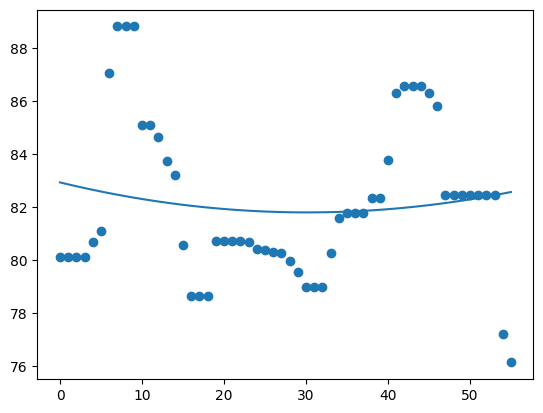

In [360]:
popt, _ = curve_fit(objective_quadratic, np.array(x_right_arm), y_right_arm)
a, b, c = popt
y_line = objective_quadratic(np.array(x_right_arm), a, b, c)
plt.scatter(x_right_arm, y_right_arm)
plt.plot(x_right_arm, y_line)
plt.show()

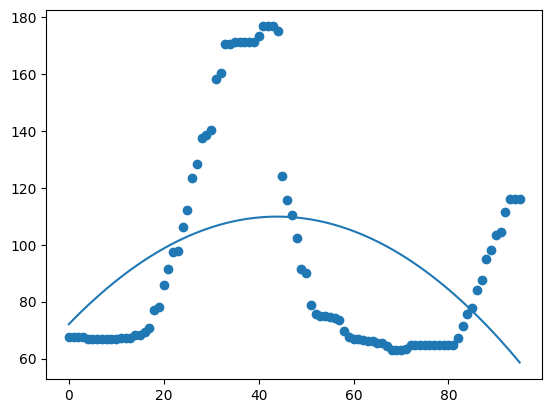

In [361]:
popt, _ = curve_fit(objective_quadratic, np.array(x_left_arm), y_left_arm)
a, b, c = popt
y_line = objective_quadratic(np.array(x_left_arm), a, b, c)
plt.scatter(x_left_arm, y_left_arm)
plt.plot(x_left_arm, y_line)
plt.show()